In [0]:
import nltk as nlt
import numpy as np

In [0]:
import spacy as sp
import pandas as pd

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=1IhOqWVqtRn8WOnL7IR1yyRiy5ck1nQ83"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('customer_reviews.csv')  
df = pd.read_csv("customer_reviews.csv")


     |████████████████████████████████| 993kB 24.5MB/s 
1IhOqWVqtRn8WOnL7IR1yyRiy5ck1nQ83


In [4]:
df.shape

(28332, 24)

In [5]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [0]:
dfwhole=df[["reviews.text","reviews.rating","categories"]]

In [8]:
dfwhole.shape

(28332, 3)

In [14]:
dfwhole.columns

Index(['reviews.text', 'reviews.rating', 'categories'], dtype='object')

In [0]:
from nltk.corpus import stopwords

In [0]:
from string import punctuation
from nltk.tokenize import word_tokenize, sent_tokenize 

In [11]:
nlt.download('stopwords')
stuff_to_be_removed=list(stopwords.words("english"))+list(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
dfwhole['reviews.text']=dfwhole['reviews.text'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
corpus = dfwhole['reviews.text'].tolist()

In [0]:
from nltk.tokenize import word_tokenize

In [0]:
from nltk.stem import LancasterStemmer

In [16]:
stemmer=LancasterStemmer()
from collections import Counter
nlt.download('punkt')
nlt.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
final_corpus=[]
tagged=[]
adjectives=[]
d2=[]
text_adj=[]

for x in range(len(corpus)):
    d1=[]
    text=word_tokenize(corpus[x].lower())
    text = [stemmer.stem(y) for y in text if y not in stuff_to_be_removed]
    tagged = nlt.pos_tag(text) 
    for x in tagged:
        if x[1].startswith('J'):
            d1.append(x[0])
            d2.append(x[0])
    counts=dict(Counter(d1))
    ent = " ".join(text)
    final_corpus.append(ent)
    adjectives.append(counts)
    

In [0]:
from nltk import pos_tag

In [0]:
##Extracting Adjectives
adj=[]
for x in range(len(final_corpus)):
  adjs = word_tokenize(final_corpus[x])
  adjs=[word for word,pos in pos_tag(adjs) if pos.startswith('JJ')]
  sentjj = " ".join(adjs)
  adj.append(sentjj)

In [38]:
!pip install wordcloud

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

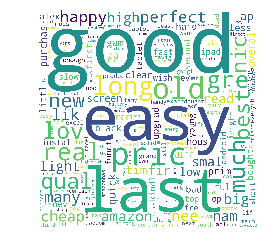

In [25]:
d3=Counter(d2)
wordcloud = WordCloud(height=1400,width=1400,background_color='white').generate_from_frequencies(d3) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
from textblob import TextBlob

In [0]:
##Sentiment Analysis 
sentiment = []
classoftext=[]
for i in range(len(adj)):
  text=TextBlob(adj[i])
  pol = text.sentiment
  sentiment.append(pol)

In [29]:
sent_all = pd.DataFrame(sentiment)
sent_all.head()

,polarity,subjectivity
0,-0.700000,0.666667
1,-0.166667,0.066667
2,0.800000,1.000000
3,0.200000,0.200000
4,0.000000,0.066667


In [0]:
###Classification into postive,negative and neutral

classi=[]
for i in sent_all['polarity']:
  if i > 0.00 and i <=1:
    classi.append('Positive')
  elif i == 0.00:
    classi.append('Neutral')
  else:
    classi.append('Negative')


In [0]:
## Final output
pol = sent_all['polarity'].tolist()
finaldf=pd.DataFrame()
finaldf['processed_data']=final_corpus
finaldf['adjectives']=adj
finaldf['polarity']=pol
finaldf['classification']=classi

In [116]:
finaldf.head()

,processed_data,adjectives,polarity,classification
0,ord 3 on item bad qual miss backup spring put ...,bad qual,-0.700000,Negative
1,bulk alway less expend way go produc lik,bulk less expend produc,-0.166667,Negative
2,wel duracel pric happy,happy,0.800000,Positive
3,seem work wel nam brand battery much bet pric,seem nam much,0.200000,Positive
4,battery long last pric gre,last pric,0.000000,Neutral


In [0]:
#Plotting graphs for the classification
import matplotlib.pyplot as plt

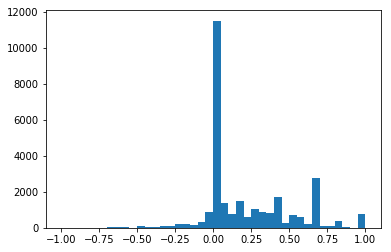

In [42]:
plt.hist(pol,bins=40)
plt.show()

In [0]:
# This shows that most of the reviews are having a positive sentiment.